In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib import rc

# 2021 인구 + cctv + 범죄

In [42]:
import pandas as pd

# 인구 데이터 로드
pop_seoul = pd.read_csv("서울시 인구 (2021).csv", header=2, usecols=['동별(2)', '소계.1'])

# 컬럼명을 명확하게 변경
pop_seoul.rename(
    columns={
        pop_seoul.columns[0]: '자치구',
        pop_seoul.columns[1]: '인구수'
    },
    inplace=True
)
# cctv 데이터 로드
cctv_seoul = pd.read_csv('서울시 자치구 연도별 방범용 CCTV 운영 현황.csv', encoding='EUC-KR', header=0, usecols=['구분','2021년'])

cctv_seoul.rename(
    columns={
        cctv_seoul.columns[0]:'자치구',
        cctv_seoul.columns[1]:'CCTV'
               
    },
    inplace=True
)

# 범죄 데이터 로드
crime_seoul = pd.read_csv('서울시 5대범죄 발생현황 (2021).csv', encoding='UTF-8', header=3)

# 첫 번째 열 제거
crime_seoul_without_first_column = crime_seoul.drop(crime_seoul.columns[0], axis=1)

# 컬럼명을 명확하게 변경
crime_seoul_without_first_column.rename(
    columns={
        crime_seoul_without_first_column.columns[0]: '자치구',
        crime_seoul_without_first_column.columns[1]: '범죄 발생 총계',
        crime_seoul_without_first_column.columns[2]: '범죄 검거 총계',
        crime_seoul_without_first_column.columns[3]: '살인 발생',
        crime_seoul_without_first_column.columns[4]: '살인 검거',
        crime_seoul_without_first_column.columns[5]: '강도 발생',
        crime_seoul_without_first_column.columns[6]: '강도 검거',
        crime_seoul_without_first_column.columns[7]: '강간·강제추행 발생',
        crime_seoul_without_first_column.columns[8]: '강간·강제추행 검거',
        crime_seoul_without_first_column.columns[9]: '절도 발생',
        crime_seoul_without_first_column.columns[10]: '절도 검거',
        crime_seoul_without_first_column.columns[11]: '폭력 발생',
        crime_seoul_without_first_column.columns[12]: '폭력 검거'
    },
    inplace=True
)

# '자치구'를 기준으로 중복된 행을 제거
pop_seoul.drop_duplicates(subset='자치구', keep='first', inplace=True)
crime_seoul_without_first_column.drop_duplicates(subset='자치구', keep='first', inplace=True)

# '자치구'를 기준으로 두 DataFrame을 병합
merged_data_2021= pd.merge(pop_seoul, crime_seoul_without_first_column, on='자치구', how='inner')
merged_data_2021=pd.merge(merged_data_2021, cctv_seoul, on='자치구', how='inner')

merged_data_2021.head(30)


,자치구,인구수,범죄 발생 총계,범죄 검거 총계,살인 발생,살인 검거,강도 발생,강도 검거,강간·강제추행 발생,강간·강제추행 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,CCTV
0,종로구,153789,2712,2755,6,3,4,4,156,757,1079,743,1467,1248,"1,573"
1,중구,131787,2861,2072,6,6,6,6,161,97,1279,739,1409,1224,"1,911"
2,용산구,237285,2381,1659,3,2,1,1,141,103,945,484,1291,1069,"2,321"
3,성동구,292672,2112,1510,3,4,4,1,110,82,905,497,1090,926,"3,519"
4,광진구,352627,3087,2202,5,3,4,4,208,161,1414,754,1456,1280,"3,111"
5,동대문구,352006,2959,2113,3,4,7,8,169,147,1240,659,1540,1295,"2,471"
6,중랑구,391885,3210,2405,4,4,6,7,141,117,1399,835,1660,1442,"3,592"
7,성북구,440142,2411,1787,4,3,2,2,118,88,895,474,1392,1220,"3,815"
8,강북구,302563,2301,1912,4,4,1,1,136,115,777,537,1383,1255,"2,960"
9,도봉구,319373,1860,1294,2,2,2,1,72,64,772,376,1012,851,"1,684"


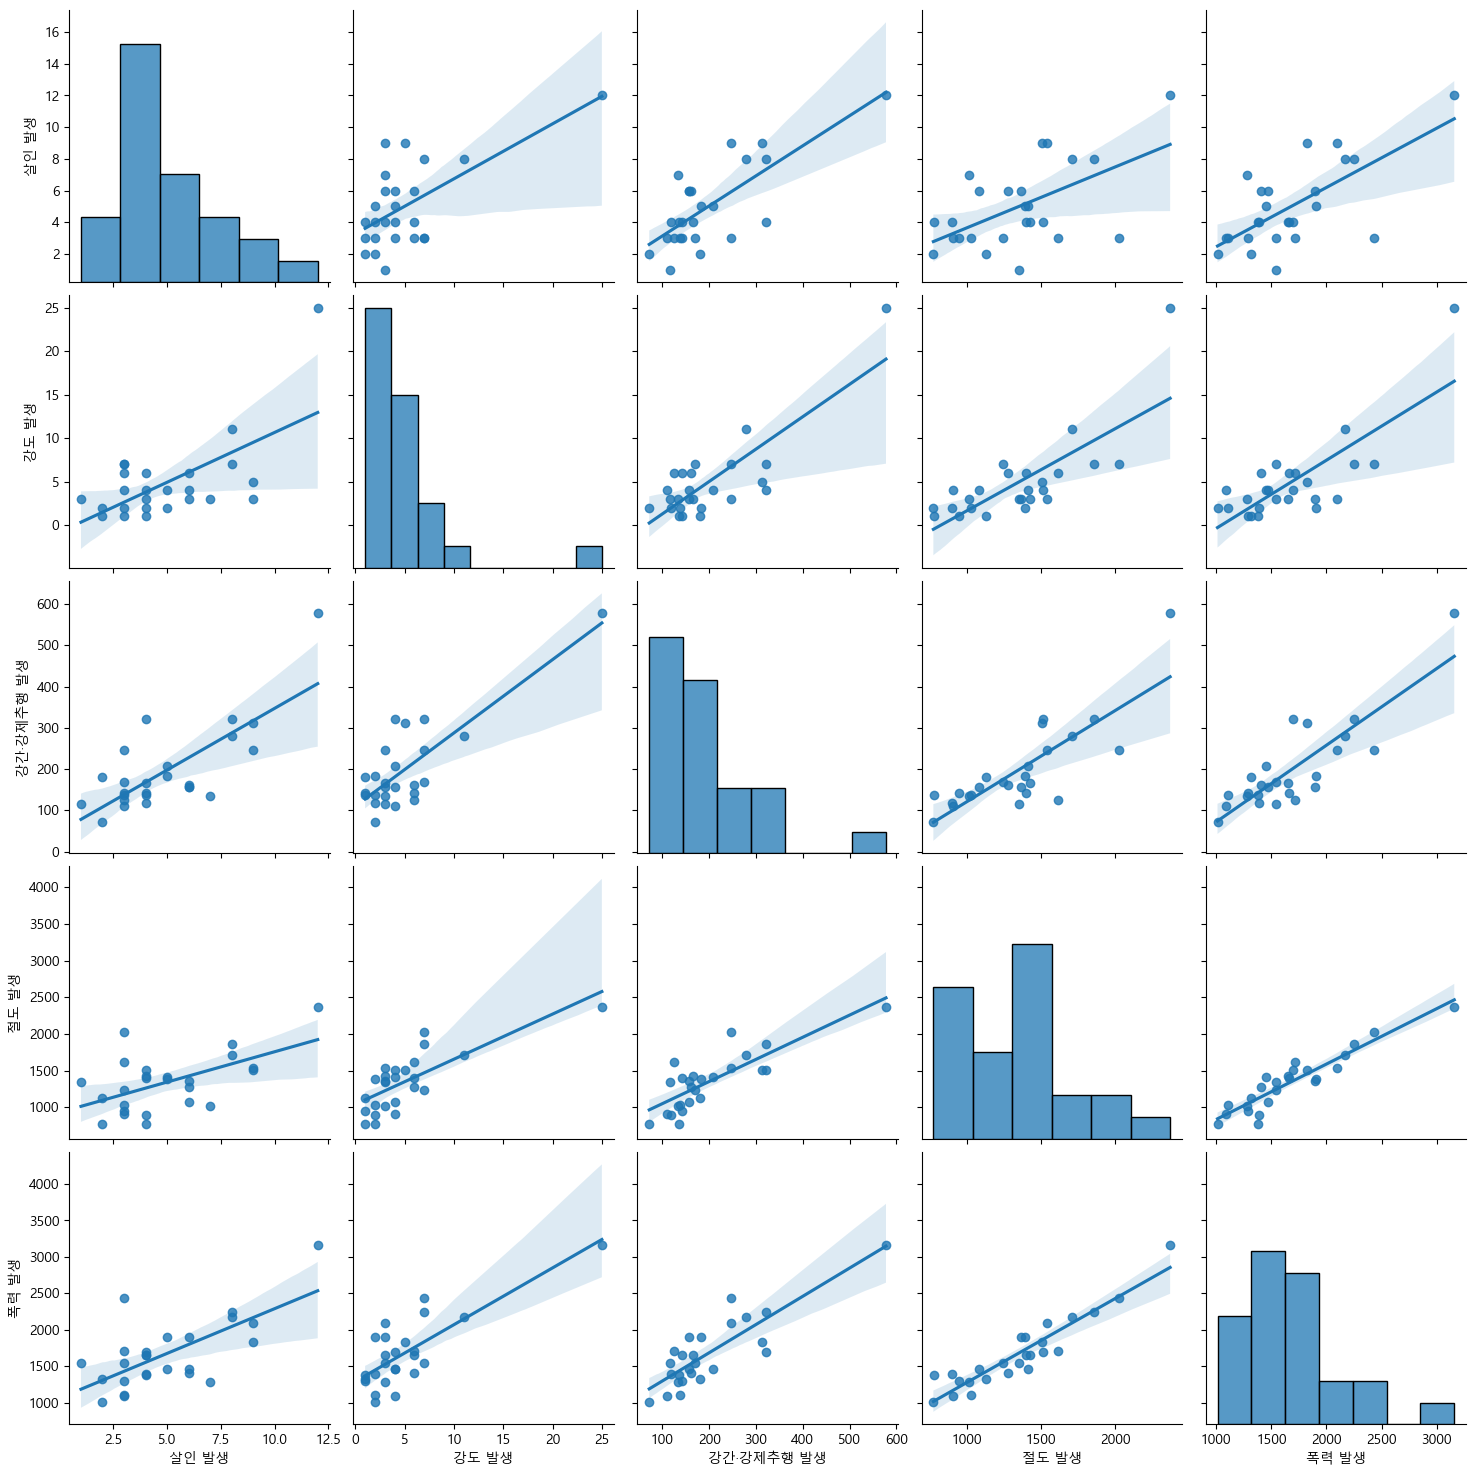

In [43]:
rc('font',family='Malgun Gothic')
sns.pairplot(data=merged_data_2021, vars=['살인 발생','강도 발생','강간·강제추행 발생','절도 발생','폭력 발생'],kind='reg',height=3 )

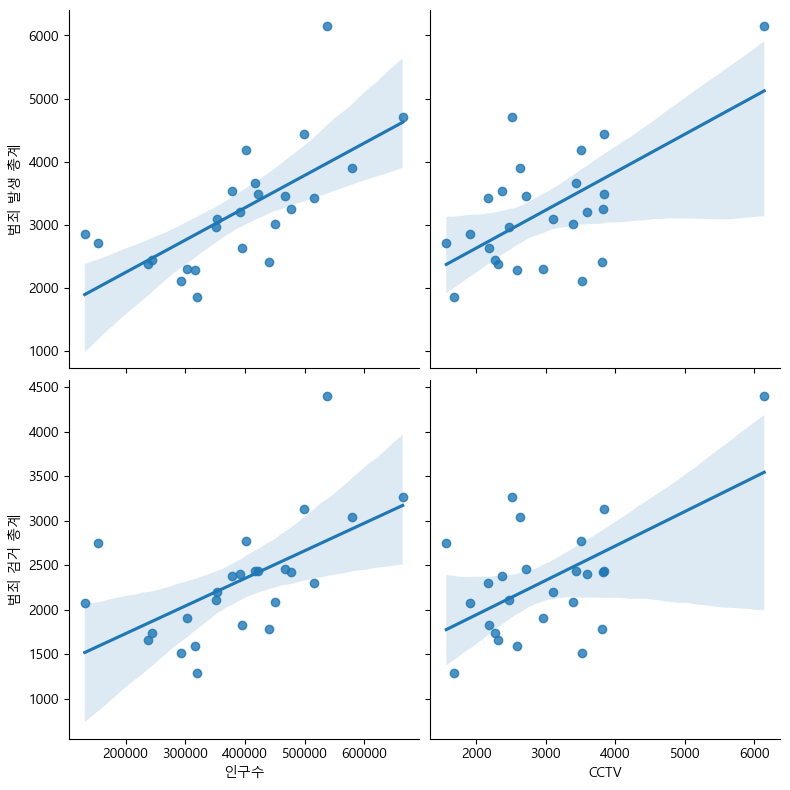

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'CCTV' 열을 숫자로 변환하고 pairplot 생성
merged_data_2021['CCTV'] = merged_data_2021['CCTV'].astype(float)

sns.pairplot(
    data=merged_data_2021,
    x_vars=['인구수', 'CCTV'],
    y_vars=['범죄 발생 총계', '범죄 검거 총계'],
    kind='reg',
    height=4
)

plt.show()


# 2022 인구 + cctv + 범죄

In [56]:
import pandas as pd

# 인구 데이터 로드
pop_seoul = pd.read_csv("서울시 인구 (2022).csv", header=2, usecols=['동별(2)', '소계.1'])

# 컬럼명을 명확하게 변경
pop_seoul.rename(
    columns={
        pop_seoul.columns[0]: '자치구',
        pop_seoul.columns[1]: '인구수'
    },
    inplace=True
)
# cctv 데이터 로드
cctv_seoul = pd.read_csv('서울시 자치구 연도별 방범용 CCTV 운영 현황.csv', encoding='EUC-KR', header=0, usecols=['구분','2022년'])

cctv_seoul.rename(
    columns={
        cctv_seoul.columns[0]:'자치구',
        cctv_seoul.columns[1]:'CCTV'
               
    },
    inplace=True
)

# 범죄 데이터 로드
crime_seoul = pd.read_csv('서울시 5대범죄 발생현황 (2022).csv', encoding='UTF-8', header=3)

# 첫 번째 열 제거
crime_seoul_without_first_column = crime_seoul.drop(crime_seoul.columns[0], axis=1)

# 컬럼명을 명확하게 변경
crime_seoul_without_first_column.rename(
    columns={
        crime_seoul_without_first_column.columns[0]: '자치구',
        crime_seoul_without_first_column.columns[1]: '범죄 발생 총계',
        crime_seoul_without_first_column.columns[2]: '범죄 검거 총계',
        crime_seoul_without_first_column.columns[3]: '살인 발생',
        crime_seoul_without_first_column.columns[4]: '살인 검거',
        crime_seoul_without_first_column.columns[5]: '강도 발생',
        crime_seoul_without_first_column.columns[6]: '강도 검거',
        crime_seoul_without_first_column.columns[7]: '강간·강제추행 발생',
        crime_seoul_without_first_column.columns[8]: '강간·강제추행 검거',
        crime_seoul_without_first_column.columns[9]: '절도 발생',
        crime_seoul_without_first_column.columns[10]: '절도 검거',
        crime_seoul_without_first_column.columns[11]: '폭력 발생',
        crime_seoul_without_first_column.columns[12]: '폭력 검거'
    },
    inplace=True
)

# '자치구'를 기준으로 중복된 행을 제거
pop_seoul.drop_duplicates(subset='자치구', keep='first', inplace=True)
crime_seoul_without_first_column.drop_duplicates(subset='자치구', keep='first', inplace=True)

# '자치구'를 기준으로 두 DataFrame을 병합
merged_data_2022 = pd.merge(pop_seoul, crime_seoul_without_first_column, on='자치구', how='inner')
merged_data_2022=pd.merge(merged_data_2022, cctv_seoul, on='자치구', how='inner')

merged_data_2022.head(30)


,자치구,인구수,범죄 발생 총계,범죄 검거 총계,살인 발생,살인 검거,강도 발생,강도 검거,강간·강제추행 발생,강간·강제추행 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,CCTV
0,종로구,152211,3138,3284,2,3,8,8,228,988,1313,932,1587,1353,"1,812"
1,중구,130785,3071,2119,1,2,5,4,194,123,1365,724,1506,1266,"2,026"
2,용산구,233284,2967,2093,5,3,7,7,280,238,978,508,1697,1337,"2,531"
3,성동구,288234,2194,1597,2,2,2,2,125,97,979,538,1086,958,"3,627"
4,광진구,351252,3619,2498,6,5,-,-,230,174,1670,831,1713,1488,"3,370"
5,동대문구,353601,3253,2231,4,4,2,2,125,106,1556,823,1566,1296,"2,592"
6,중랑구,390140,3599,2671,2,2,2,2,150,121,1508,882,1937,1664,"3,856"
7,성북구,441984,2749,2125,3,3,1,1,158,129,1143,715,1444,1277,"4,014"
8,강북구,297702,2832,2343,5,4,5,6,177,147,872,589,1773,1597,"3,184"
9,도봉구,313989,2141,1569,3,3,-,-,70,54,969,546,1099,966,"1,994"


In [65]:
import numpy as np

# '-'를 NaN으로 대체하고 숫자로 변환
merged_data_2022[columns_to_convert] = merged_data_2022[columns_to_convert].replace('-', np.nan, regex=True).astype(float)

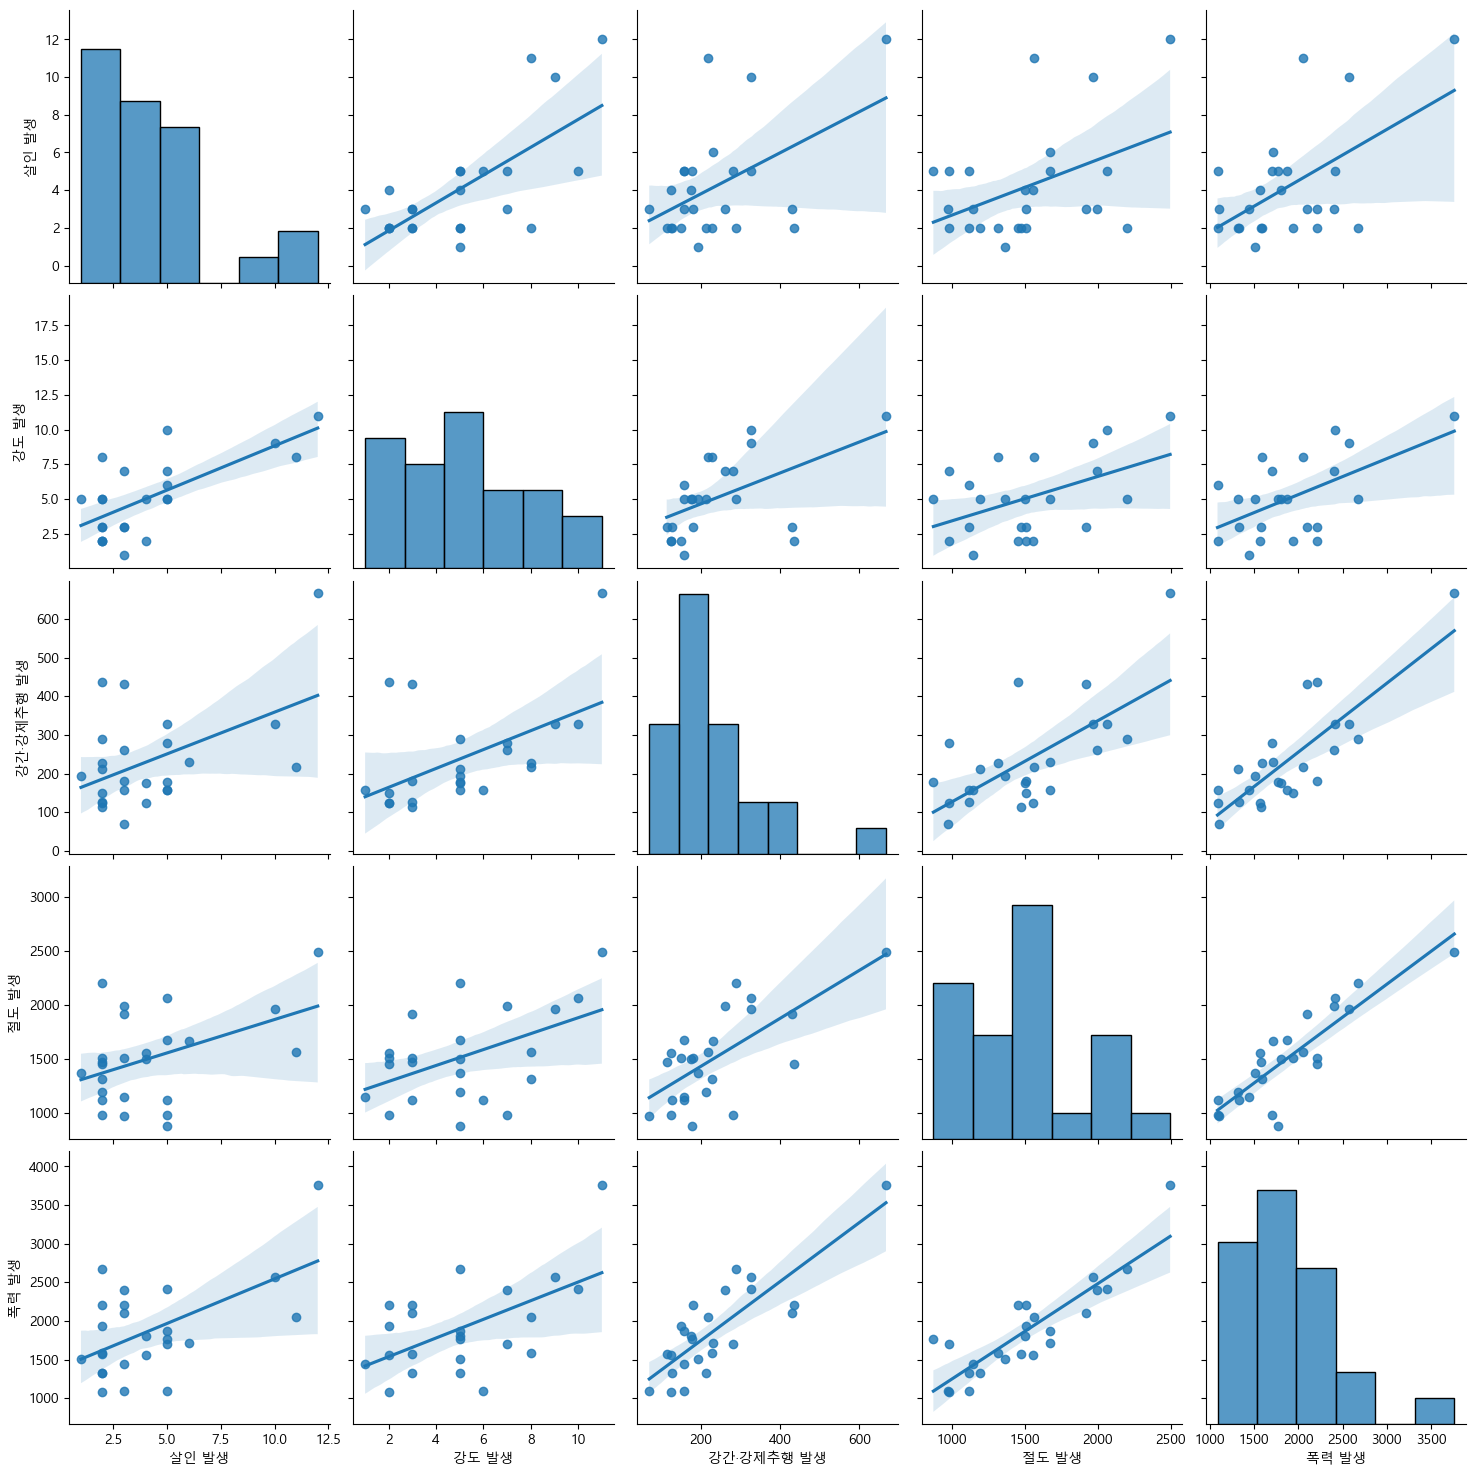

In [66]:
rc('font',family='Malgun Gothic')
sns.pairplot(data=merged_data_2022, vars=['살인 발생','강도 발생','강간·강제추행 발생','절도 발생','폭력 발생'],kind='reg',height=3 )

In [68]:
# 'CCTV' 열의 콤마 제거하고 숫자로 변환
merged_data_2022['CCTV'] = merged_data_2022['CCTV'].str.replace(',', '').astype(float)

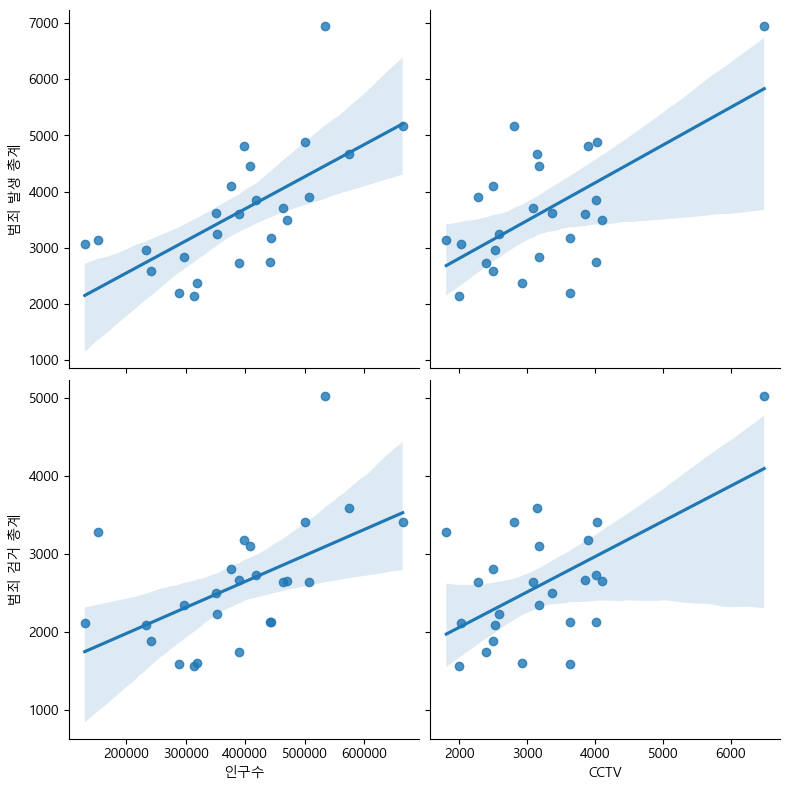

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(
    data=merged_data_2022,
    x_vars=['인구수', 'CCTV'],
    y_vars=['범죄 발생 총계', '범죄 검거 총계'],
    kind='reg',
    height=4
)

plt.show()


# 증감률 비교

In [2]:
import pandas as pd

# CSV 개수 파일에서 데이터 로드
cctvnum_seoul = pd.read_csv('서울시 년도별 CCTV 설치 현황.csv', encoding='EUC-KR', header=1, usecols=['계','92,991'])

cctvnum_seoul.rename(
    columns={
        cctvnum_seoul.columns[0]:'자치구',
        cctvnum_seoul.columns[1]:'CCTV 총계'
               
    },
    inplace=True
)

# CCTV 설치 현황 데이터 로드
cctv_seoul = pd.read_csv('서울시 자치구 연도별 방범용 CCTV 운영 현황.csv', encoding='EUC-KR', header=0, usecols=['구분', '2021년', '2022년'])
cctv_seoul.rename(
    columns={
        cctv_seoul.columns[0]: '자치구',
        cctv_seoul.columns[1]: 'CCTV_2021',
        cctv_seoul.columns[2]: 'CCTV_2022'
    },
    inplace=True
)

# '2021년'과 '2022년' 열의 값을 숫자로 변환 (쉼표(,) 제거)
cctv_seoul['CCTV_2021'] = cctv_seoul['CCTV_2021'].str.replace(',', '').astype(float)
cctv_seoul['CCTV_2022'] = cctv_seoul['CCTV_2022'].str.replace(',', '').astype(float)

# '자치구' 열을 문자열로 변환
cctv_seoul['자치구'] = cctv_seoul['자치구'].astype(str)

# 2021년과 2022년 CCTV 설치 현황 및 증감률 계산
cctv_percent_change = cctv_seoul.copy()
cctv_percent_change['CCTV 증감률'] = ((cctv_percent_change['CCTV_2022'] - cctv_percent_change['CCTV_2021']) / cctv_percent_change['CCTV_2021']) * 100

# CSV 파일에서 데이터 로드
pop_seoul_2021 = pd.read_csv("서울시 인구 (2021).csv", header=2, usecols=['동별(2)', '소계.1'])
pop_seoul_2022 = pd.read_csv("서울시 인구 (2022).csv", header=2, usecols=['동별(2)', '소계.1'])

# 컬럼 이름 변경
pop_seoul_2021.rename(
    columns={
        '동별(2)': '지역',
        '소계.1': '인구수_2021',
    },
    inplace=True
)

pop_seoul_2022.rename(
    columns={
        '동별(2)': '지역',
        '소계.1': '인구수_2022',
    },
    inplace=True
)
# '소계' 행 제외
pop_seoul_2021 = pop_seoul_2021[~pop_seoul_2021['지역'].str.contains('소계')]
pop_seoul_2022 = pop_seoul_2022[~pop_seoul_2022['지역'].str.contains('소계')]

# 두 파일 병합
merged_df = pd.merge(pop_seoul_2021, pop_seoul_2022, on='지역')

# 데이터 타입 변환: 숫자로 변환 가능한 값만 남기고 나머지는 NaN으로 처리
merged_df['인구수_2021'] = pd.to_numeric(merged_df['인구수_2021'], errors='coerce')
merged_df['인구수_2022'] = pd.to_numeric(merged_df['인구수_2022'], errors='coerce')

# 인구수 증감률 계산
merged_df['인구수 증감률'] = ((merged_df['인구수_2022'] - merged_df['인구수_2021']) / merged_df['인구수_2021']) * 100

# 2021년 5대 범죄 발생 현황 데이터 로드
crime_seoul_2021 = pd.read_csv('서울시 5대범죄 발생현황 (2021).csv', encoding='UTF-8', header=3)

# '소계' 행 삭제
crime_seoul_2021 = crime_seoul_2021[~crime_seoul_2021.iloc[:, 0].str.contains('소계')]

# 1열 제거하여 새로운 데이터프레임 생성
crime_seoul_2021 = crime_seoul_2021.drop(crime_seoul_2021.columns[0], axis=1)

# 컬럼 이름 변경
crime_seoul_2021.rename(
    columns={
        crime_seoul_2021.columns[0]: '자치구',
        crime_seoul_2021.columns[1]: '발생 총계',
        crime_seoul_2021.columns[2]: '검거 총계',
        crime_seoul_2021.columns[3]: '살인 발생',
        crime_seoul_2021.columns[4]: '살인 검거',
        crime_seoul_2021.columns[5]: '강도 발생',
        crime_seoul_2021.columns[6]: '강도 검거',
        crime_seoul_2021.columns[7]: '강간·강제추행 발생',
        crime_seoul_2021.columns[8]: '강간·강제추행 검거',
        crime_seoul_2021.columns[9]: '절도 발생',
        crime_seoul_2021.columns[10]: '절도 검거',
        crime_seoul_2021.columns[11]: '폭력 발생',
        crime_seoul_2021.columns[12]: '폭력 검거'
    },
    inplace=True
)

# '소계' 행 삭제
crime_seoul_2021 = crime_seoul_2021[crime_seoul_2021['자치구'] != '소계']

# 2022년 5대 범죄 발생 현황 데이터 로드
crime_seoul_2022 = pd.read_csv('서울시 5대범죄 발생현황 (2022).csv', encoding='UTF-8', header=3)

# '소계' 행 삭제
crime_seoul_2022 = crime_seoul_2022[~crime_seoul_2022.iloc[:, 0].str.contains('소계')]

# 1열 제거하여 새로운 데이터프레임 생성
crime_seoul_2022 = crime_seoul_2022.drop(crime_seoul_2022.columns[0], axis=1)

# 컬럼 이름 변경
crime_seoul_2022.rename(
    columns={
        crime_seoul_2022.columns[0]: '자치구',
        crime_seoul_2022.columns[1]: '발생 총계',
        crime_seoul_2022.columns[2]: '검거 총계',
        crime_seoul_2022.columns[3]: '살인 발생',
        crime_seoul_2022.columns[4]: '살인 검거',
        crime_seoul_2022.columns[5]: '강도 발생',
        crime_seoul_2022.columns[6]: '강도 검거',
        crime_seoul_2022.columns[7]: '강간·강제추행 발생',
        crime_seoul_2022.columns[8]: '강간·강제추행 검거',
        crime_seoul_2022.columns[9]: '절도 발생',
        crime_seoul_2022.columns[10]: '절도 검거',
        crime_seoul_2022.columns[11]: '폭력 발생',
        crime_seoul_2022.columns[12]: '폭력 검거'
    },
    inplace=True
)

# '소계' 행 삭제
crime_seoul_2022 = crime_seoul_2022[crime_seoul_2022['자치구'] != '소계']

# 각 자치구별 총 범죄 발생 건수 계산
total_crime_2021 = crime_seoul_2021[['자치구', '발생 총계']].groupby('자치구').sum().reset_index()
total_crime_2022 = crime_seoul_2022[['자치구', '발생 총계']].groupby('자치구').sum().reset_index()

# 발생 건수를 %로 변환
crime_percent_change = pd.merge(total_crime_2021, total_crime_2022, on='자치구', suffixes=('_2021', '_2022'))
crime_percent_change['범죄 발생 증감률'] = ((crime_percent_change['발생 총계_2022'] - crime_percent_change['발생 총계_2021']) / crime_percent_change['발생 총계_2021']) * 100

# '자치구'를 기준으로 두 데이터프레임 병합
final_df = pd.merge(merged_df, crime_percent_change[['자치구', '범죄 발생 증감률']], left_on='지역', right_on='자치구', how='inner')

# 필요한 칼럼만 선택
final_df = final_df[['자치구', '인구수 증감률', '범죄 발생 증감률']]

# 검거 건수를 %로 변환
crime_percent_change = pd.merge(total_crime_2021, total_crime_2022, on='자치구', suffixes=('_2021', '_2022'))
crime_percent_change['범죄 검거 증감률'] = ((crime_percent_change['발생 총계_2022'] - crime_percent_change['발생 총계_2021']) / crime_percent_change['발생 총계_2021']) * 100
# '자치구'를 기준으로 두 데이터프레임 병합
final_df2 = pd.merge(cctv_percent_change[['자치구', 'CCTV_2021', 'CCTV_2022', 'CCTV 증감률']], crime_percent_change[['자치구', '범죄 검거 증감률']], left_on='자치구', right_on='자치구', how='inner')

# '자치구'를 기준으로 CCTV 개수 데이터프레임 병합
final_df2 = pd.merge(final_df2, cctvnum_seoul[['자치구', 'CCTV 총계']], on='자치구', how='inner')

# 필요한 칼럼만 선택
final_df2 = final_df2[['자치구', 'CCTV 총계', 'CCTV 증감률', '범죄 검거 증감률']]

# '자치구'를 기준으로 데이터프레임 병합
final_df_combined = pd.merge(final_df, final_df2, on='자치구', how='inner')

# 필요한 칼럼만 선택
final_result = final_df_combined[['자치구', '인구수 증감률', '범죄 발생 증감률', 'CCTV 총계', 'CCTV 증감률', '범죄 검거 증감률']]

# 데이터프레임 출력
final_result.head(30)

,자치구,인구수 증감률,범죄 발생 증감률,CCTV 총계,CCTV 증감률,범죄 검거 증감률
0,종로구,-1.026081,15.707965,"1,966",15.193897,15.707965
1,용산구,-1.686158,24.611508,"2,970",9.047824,24.611508
2,성동구,-1.516373,3.882576,"4,175",3.069054,3.882576
3,광진구,-0.389930,17.233560,"3,592",8.325297,17.233560
4,동대문구,0.453117,9.935789,"2,759",4.896803,9.935789
5,중랑구,-0.445284,12.118380,"4,193",7.349666,12.118380
6,성북구,0.418501,14.019079,"4,957",5.216252,14.019079
7,강북구,-1.606608,23.076923,"3,321",7.567568,23.076923
8,도봉구,-1.685803,15.107527,"2,385",18.408551,15.107527
9,노원구,-1.346161,13.751825,"2,626",5.204975,13.751825


In [20]:
# 'CCTV' 열의 콤마 제거하고 숫자로 변환
final_result['CCTV 총계'] = final_result['CCTV 총계'].str.replace(',', '').astype(float)

C:\Users\sjlim\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


C:\Users\sjlim\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\sjlim\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


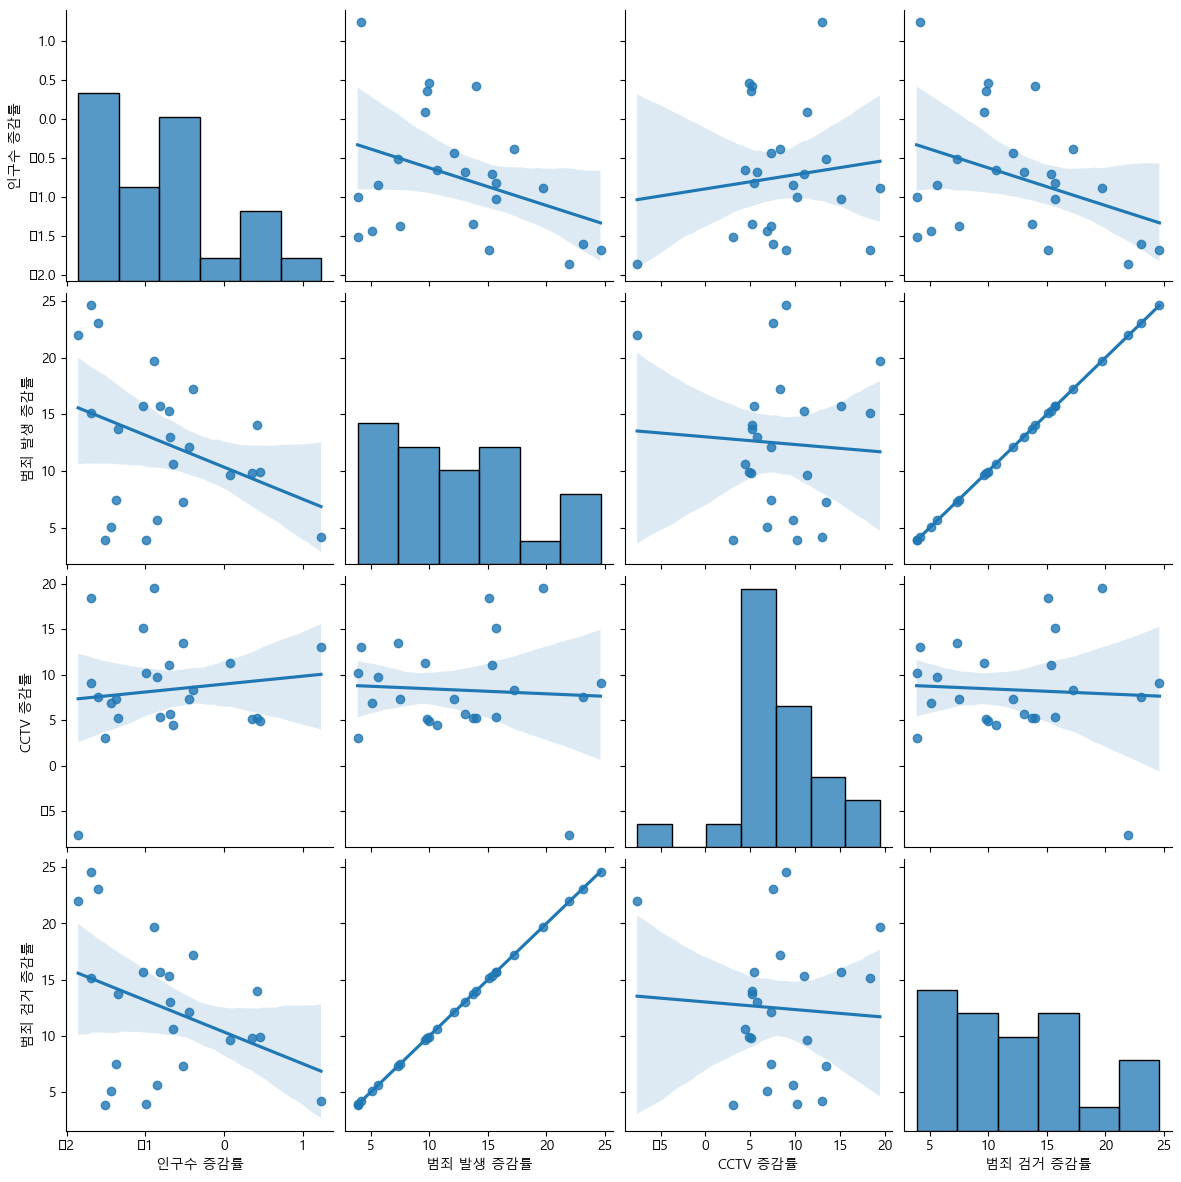

In [23]:
import seaborn as sns
rc('font',family='Malgun Gothic')
sns.pairplot(data=final_result, vars=['인구수 증감률', '범죄 발생 증감률', 'CCTV 증감률','범죄 검거 증감률'],kind='reg',height=3 )

C:\Users\sjlim\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\sjlim\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


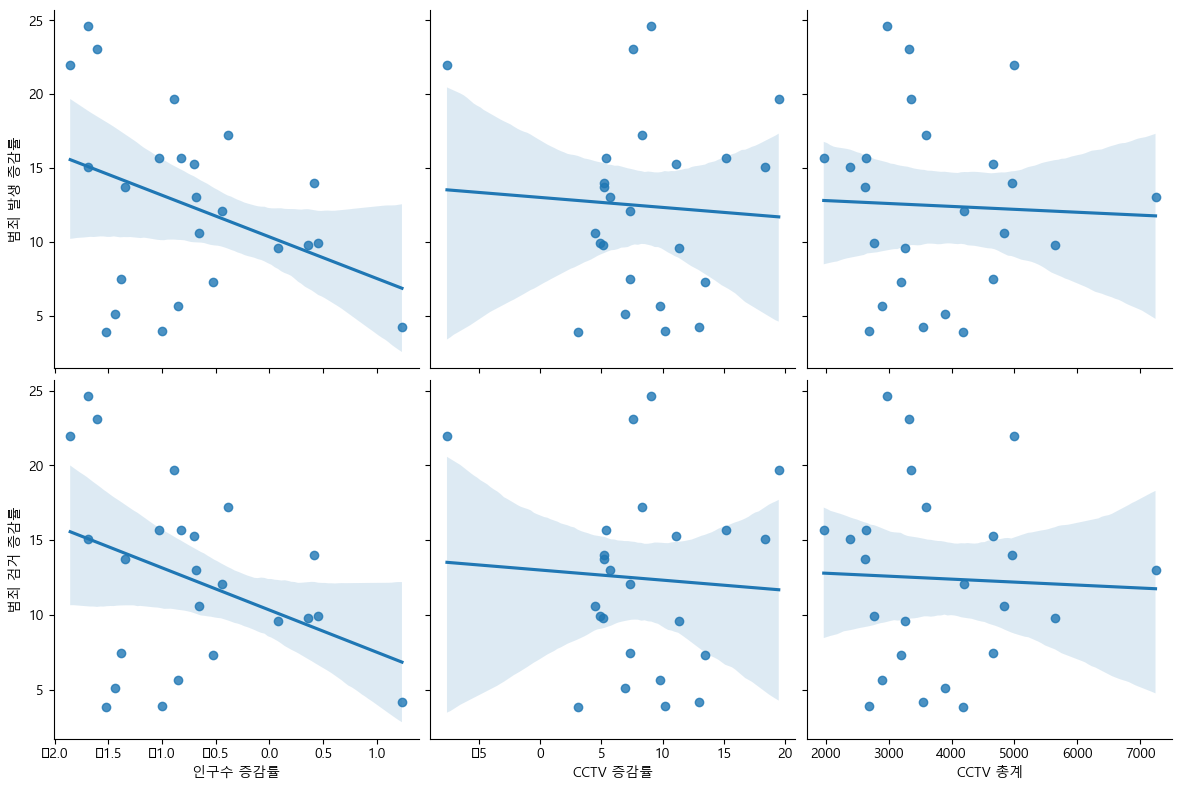

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(
    data=final_result,
    x_vars=['인구수 증감률', 'CCTV 증감률', 'CCTV 총계'],
    y_vars=['범죄 발생 증감률', '범죄 검거 증감률'],
    kind='reg',
    height=4
)

plt.show()